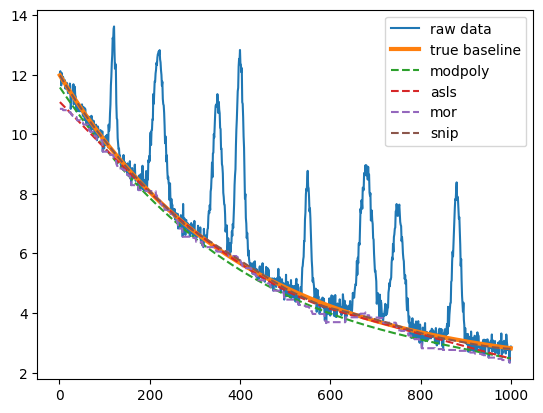

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pybaselines import Baseline, utils

x = np.linspace(1, 1000, 1000)
# a measured signal containing several Gaussian peaks
signal = (
    utils.gaussian(x, 4, 120, 5)
    + utils.gaussian(x, 5, 220, 12)
    + utils.gaussian(x, 5, 350, 10)
    + utils.gaussian(x, 7, 400, 8)
    + utils.gaussian(x, 4, 550, 6)
    + utils.gaussian(x, 5, 680, 14)
    + utils.gaussian(x, 4, 750, 12)
    + utils.gaussian(x, 5, 880, 8)
)
# exponentially decaying baseline
true_baseline = 2 + 10 * np.exp(-x / 400)
noise = np.random.default_rng(1).normal(0, 0.2, x.size)

y = signal + true_baseline + noise

baseline_fitter = Baseline(x_data=x)

bkg_1, params_1 = baseline_fitter.modpoly(y, poly_order=3)
bkg_2, params_2 = baseline_fitter.asls(y, lam=1e7, p=0.02)
bkg_3, params_3 = baseline_fitter.mor(y, half_window=30)
bkg_4, params_4 = baseline_fitter.snip(
    y, max_half_window=40, decreasing=True, smooth_half_window=3
)

plt.plot(x, y, label='raw data', lw=1.5)
plt.plot(x, true_baseline, lw=3, label='true baseline')
plt.plot(x, bkg_1, '--', label='modpoly')
plt.plot(x, bkg_2, '--', label='asls')
plt.plot(x, bkg_3, '--', label='mor')
plt.plot(x, bkg_4, '--', label='snip')

plt.legend()
plt.show()